In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt




In [2]:
path = "/content/bank marketing dataset.csv"

In [3]:
data = pd.read_csv(path)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
label_encoders = {}
encoded_data = data.copy()

for column in data.columns:
    if data[column].dtype == object:  # Only encode object-type columns (categorical)
        le = LabelEncoder()
        encoded_data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
print(encoded_data.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


#Machine Learning Models: Most machine learning algorithms require numerical input, so encoding categorical variables is necessary. For example, linear regression, logistic regression, and neural networks cannot work with categorical data directly.
#Analysis Requiring Numerical Operations: If your data analysis involves computations that require numerical values (e.g., correlation analysis), you will need to encode categorical variables.

In [5]:
#The dataset has been normalized using MinMax scaling, which scales and translates each feature individually such that it is in the range [0, 1]
scaler = MinMaxScaler()

# Select only numerical columns for normalization
numerical_cols = encoded_data.select_dtypes(include=['int64', 'float64']).columns

# Apply MinMaxScaler to the numerical columns
encoded_data[numerical_cols] = scaler.fit_transform(encoded_data[numerical_cols])
encoded_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.0,0.0,0.0,1.0,0.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.0,0.0,0.0,1.0,0.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.0,0.0,0.0,1.0,0.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.0,0.0,0.0,1.0,0.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.0,0.0,0.0,1.0,0.0


In [6]:
#Here we split the data into training and test set so that we can fit and evaluate a learning model. We will use the train_test_split() function from scikit-learn and use 80 percent of the data for training and 20 percent for testing.
X = encoded_data.drop('y', axis=1)  # Features
y = encoded_data['y']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np


# Initializing the models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svc_model = SVC(random_state=42)


# Define the number of folds for cross-validation
k = 10

# Perform cross-validation and compute mean accuracy for each model
logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=k)
logistic_cv_mean = np.mean(logistic_cv_scores)

random_forest_cv_scores = cross_val_score(random_forest_model, X, y, cv=k)
random_forest_cv_mean = np.mean(random_forest_cv_scores)

svc_cv_scroes = cross_val_score(svc_model,X,y, cv=k)
svc_cv_mean = np.mean(svc_cv_scroes)

knn_cv_scores = cross_val_score(knn_model, X, y, cv=k)
knn_cv_mean = np.mean(knn_cv_scores)

# Print the results
print(f"Logistic Regression CV Mean Accuracy: {logistic_cv_mean:.4f}")
print(f"Random Forest CV Mean Accuracy: {random_forest_cv_mean:.4f}")
print(f"SVC CV Mean Accuracy: {svc_cv_mean:.4f}")
print(f"KNN CV Mean Accuracy: {knn_cv_mean:.4f}")


Logistic Regression CV Mean Accuracy: 0.8834
Random Forest CV Mean Accuracy: 0.7588
SVC CV Mean Accuracy: 0.8588
KNN CV Mean Accuracy: 0.7098


#Based on the results obtained from cross-validation, it appears that Logistic Regression achieved the highest mean accuracy score of 88.34%, followed by Support Vector Classifier (SVC) with a mean accuracy of 85.88%. Random Forest and K-Nearest Neighbors (KNN) models achieved mean accuracies of 75.88% and 70.98%, respectively. These results suggest that Logistic Regression and SVC might be more suitable for this classification task compared to Random Forest and KNN.

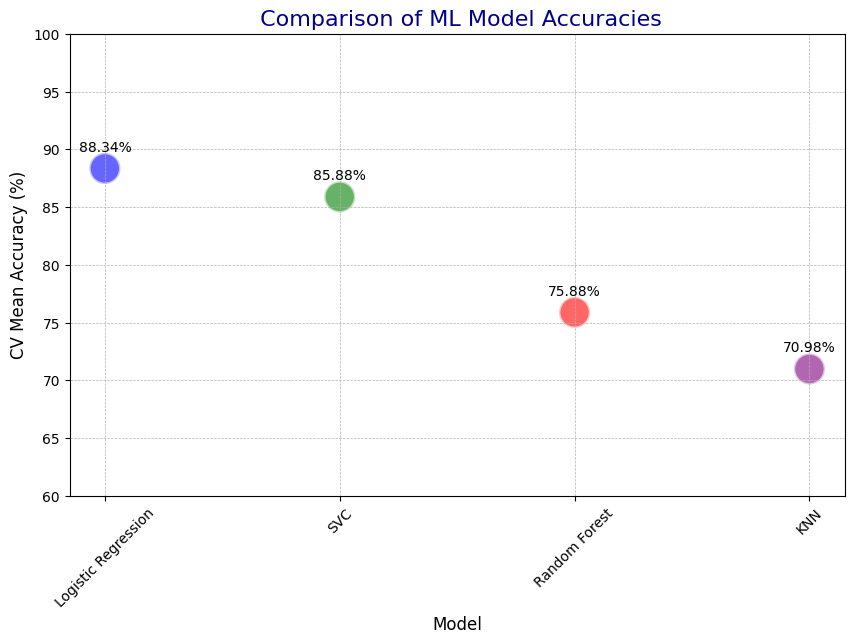

In [11]:
models = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN']
accuracies = [88.34, 85.88, 75.88, 70.98]

# Data for plotting
x = np.arange(len(models))  # the label locations
y = np.array(accuracies)

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=500, c=['blue', 'green', 'red', 'purple'], alpha=0.6, edgecolors="w", linewidth=2)

# Adding annotations
for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt}%', (x[i], y[i] + 1.5), ha='center')

# Add title and labels with a creative touch
plt.title(' Comparison of ML Model Accuracies', fontsize=16, color='darkblue')
plt.xticks(x, models, rotation=45)
plt.yticks(np.arange(60, 101, 5))
plt.ylabel('CV Mean Accuracy (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show plot
plt.show()